<a href="https://colab.research.google.com/github/Fondaaaa/Templates/blob/main/Template_classificazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv"

In [4]:
df = pd.read_csv(path) #target = species
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


**DATA CLEANING:** rimuovere o sostituire valori nulli, mancanti o non validi. Rimuovere identificatori.

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [6]:
df.isnull().sum() # numero valori nulli

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: >

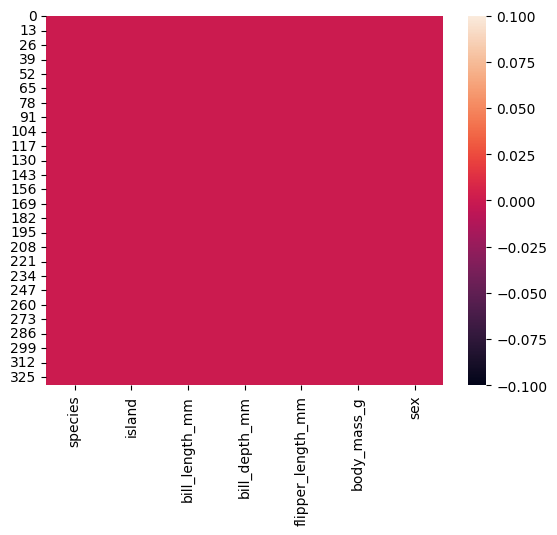

In [8]:
sb.heatmap(df.isnull())

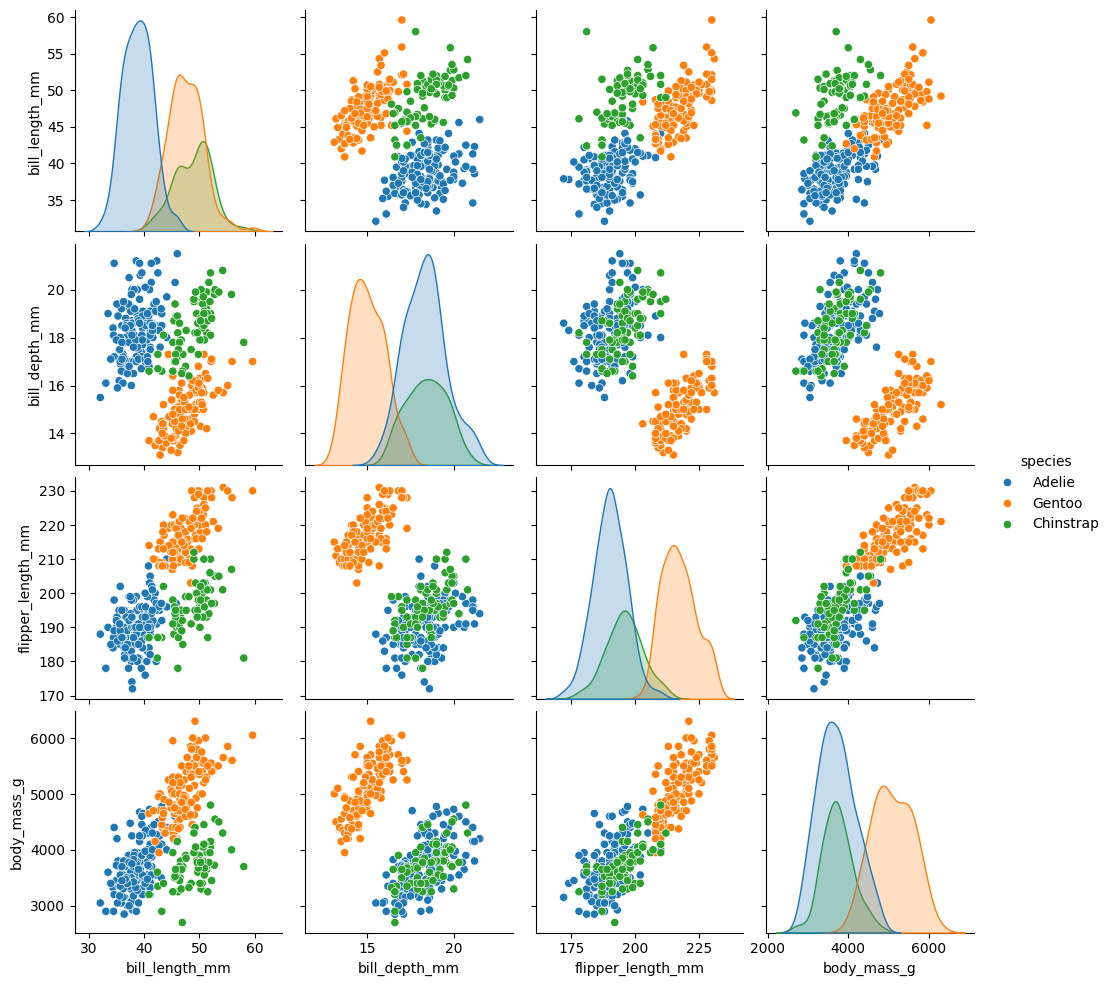

In [9]:


sb.pairplot(df,hue="species")

In [10]:
corr = df.corr(numeric_only=True)

<Axes: >

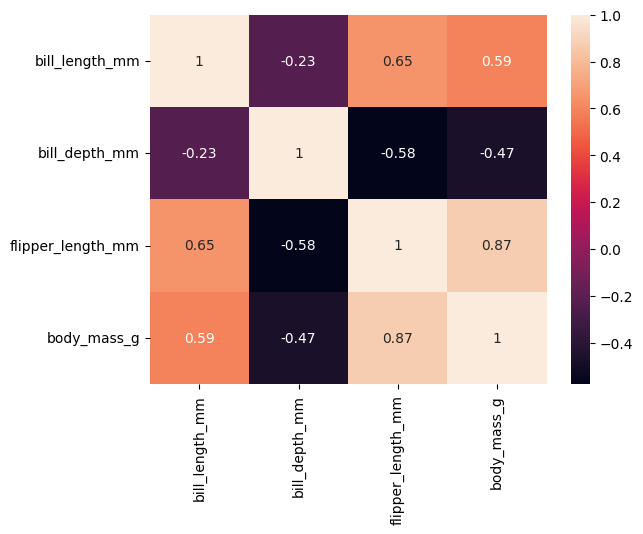

In [11]:
sb.heatmap(corr,annot=True)

<Figure size 600x600 with 0 Axes>

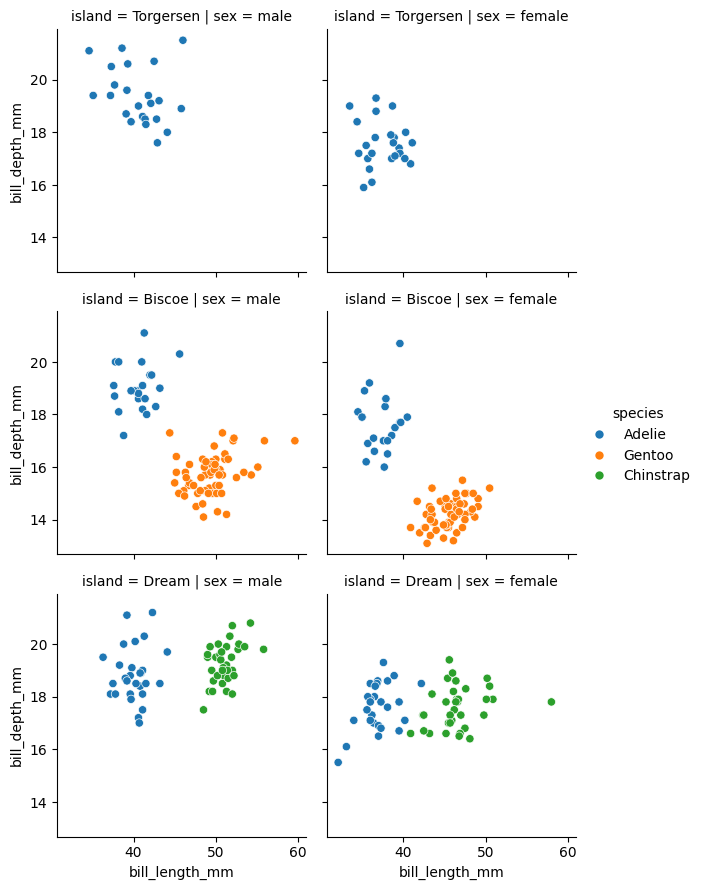

In [12]:
plt.figure(figsize=(6,6))
sb.relplot(df,x="bill_length_mm",y="bill_depth_mm",col="sex",row="island",hue="species",height=3)

# Preprocessing + inizializzione modelli

In [13]:
X = df.drop(columns="species")
y = df["species"]

In [14]:
X_= pd.get_dummies(X) #drop_first=True
X_

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,False,False,True,False,True
1,39.5,17.4,186,3800,False,False,True,True,False
2,40.3,18.0,195,3250,False,False,True,True,False
3,36.7,19.3,193,3450,False,False,True,True,False
4,39.3,20.6,190,3650,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,False,True,False,False,True
329,43.5,18.1,202,3400,False,True,False,True,False
330,49.6,18.2,193,3775,False,True,False,False,True
331,50.8,19.0,210,4100,False,True,False,False,True


In [15]:
X_

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,False,False,True,False,True
1,39.5,17.4,186,3800,False,False,True,True,False
2,40.3,18.0,195,3250,False,False,True,True,False
3,36.7,19.3,193,3450,False,False,True,True,False
4,39.3,20.6,190,3650,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,False,True,False,False,True
329,43.5,18.1,202,3400,False,True,False,True,False
330,49.6,18.2,193,3775,False,True,False,False,True
331,50.8,19.0,210,4100,False,True,False,False,True


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,random_state=1,stratify=y)

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
rfe = RFE(estimator=logreg)
rfe.fit(X_, y)

selected_features_indices = rfe.get_support(indices=True)

# Ottieni i nomi delle caratteristiche selezionate dal DataFrame
selected_features_names = X_.columns[selected_features_indices]

features = []
for name in selected_features_names:
    features.append(name)
features



['bill_depth_mm', 'island_Biscoe', 'island_Dream', 'sex_female']

Modelli classificazione:

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifiers = [DecisionTreeClassifier(max_depth=4),
               RandomForestClassifier(n_estimators=200,random_state=667),
               GradientBoostingClassifier(),
               GradientBoostingClassifier(n_estimators=50),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True,kernel='rbf')
               ]

for cls in classifiers:
    cls.fit(X_train, y_train)

# Metrics

Scegliere modello migliore

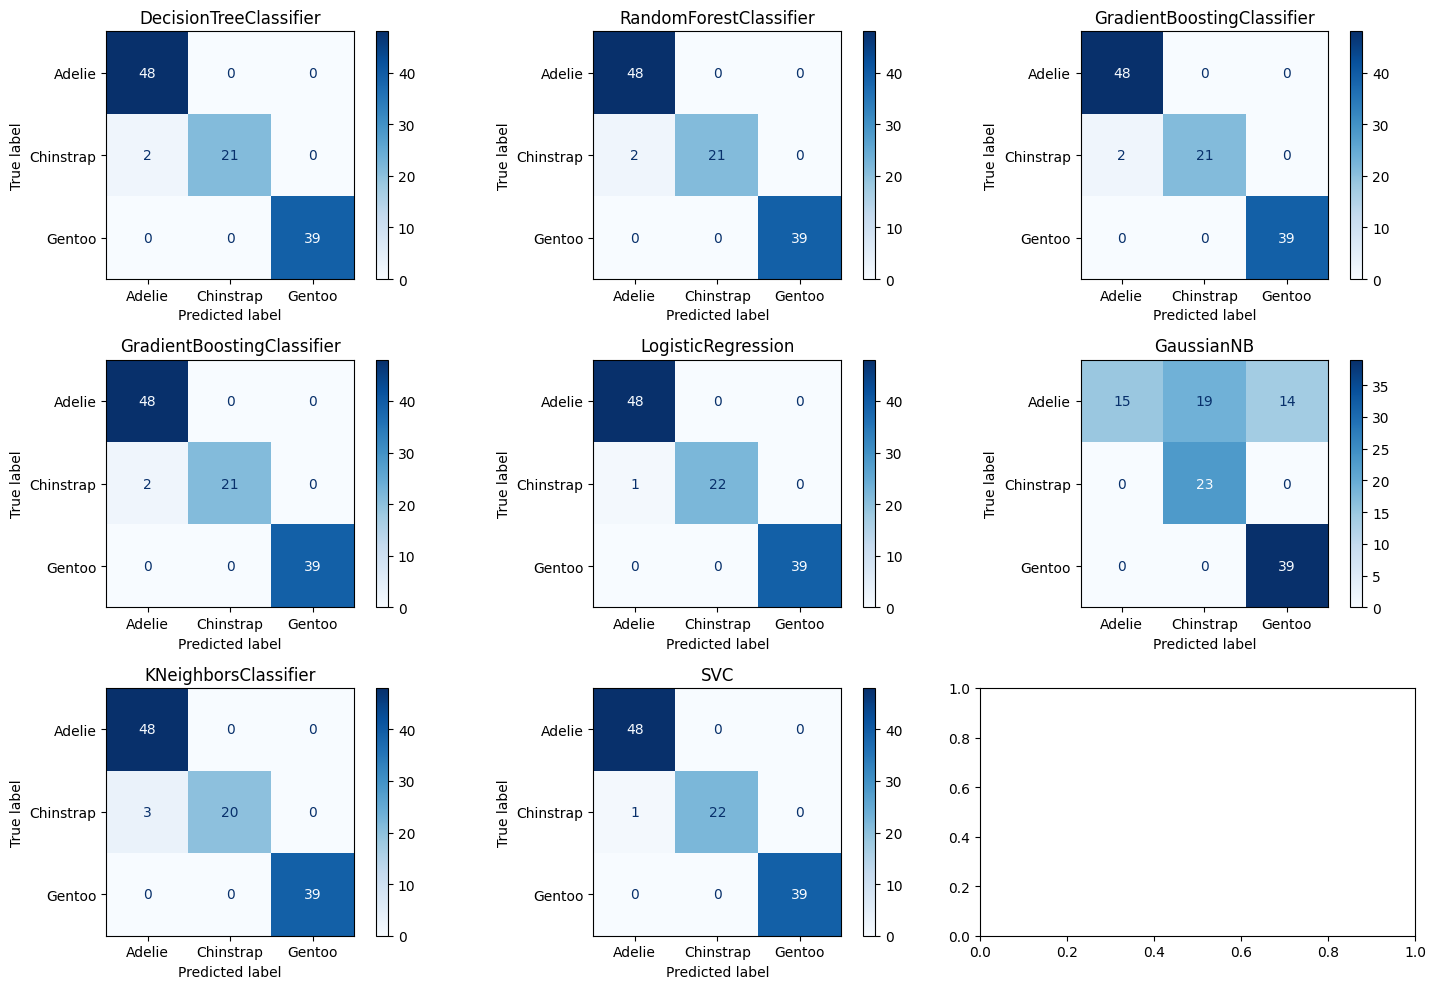

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

#labels = [label1,label2,label3] #se variabili numeriche
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues',
                                            #labels=labels
                                            )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()

In [21]:
from sklearn.metrics import classification_report

for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.98       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.98      0.98      0.98       110

RandomForestClassifier(n_estimators=200, random_state=667)
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.98       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.98      0.98      0.98       110

GradientBoostingClassifier()
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Ch

ROC Curve se target binaria:



```
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

Train the models and record the results
plt.figure(figsize=(8,7))
ax = plt.gca()
plt.plot([0,1],[0,1],'--b')

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_score =model.predict_proba(X_test)[:, 1]
    auc_model = roc_auc_score(y_test,y_score)

    RocCurveDisplay.from_estimator(model, X_test, y_test, label=f'{cls.__class__.__name__} (AUC = {auc_model:.2f})', ax=ax)
    plt.title("Receiver Operating Characteristic (ROC) curves")
    plt.legend(loc=4)
```



Controllare overfitting:

Grid Search: (per modello migliore)

In [22]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]
            }

rf = RandomForestClassifier(random_state=667)
grid_search_rf = GridSearchCV(estimator = rf,
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 0
                            )
grid_search_rf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=667),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [23]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [24]:
rf_best = RandomForestClassifier(bootstrap=True,max_depth=80,max_features=2,min_samples_leaf=3,min_samples_split=8,n_estimators=100)

rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)

In [25]:
# rf_best.predict([[feature1,feature2,...]])